## Importing Dependencies

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

## Data collection and processing

In [6]:
#loading data to a pandas dataframe
diabetes_data = pd.read_csv('diabetes.csv')

In [8]:
# printing first 5 rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# printing last 5 rows
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
# cehcking for rows and column in dataset
diabetes_data.shape

(768, 9)

In [14]:
# getting more information about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# checking for missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# statistical measures about the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# checking the distribution of target varibale
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> No diabteses
1 --> diabetes

### splitting the features and target

In [24]:
X = diabetes_data.drop(columns='Outcome', axis=1)
Y = diabetes_data['Outcome']

In [26]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [28]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### splitting the data into training data and test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Model Training

## Logistic Regression

In [38]:
model = LogisticRegression()

In [40]:
# training the logistic regression model with training data
model.fit(X_train, Y_train)

/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation (Logisitc Regression)

In [157]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy_model = accuracy_score(X_train_prediction, Y_train)
training_data_precision_model = precision_score(X_train_prediction, Y_train)
training_data_f1score_model = f1_score(X_train_prediction, Y_train)
training_data_recall_model = recall_score(X_train_prediction, Y_train)

In [159]:
print('Accuracy on Training data : ', training_data_accuracy_model)
print('Precision on Training data : ', training_data_precision_model)
print('F1 Score on Training data : ', training_data_f1score_model)
print('Recall on Training data : ', training_data_recall_model)

Accuracy on Training data :  0.7850162866449512
Precision on Training data :  0.5841121495327103
F1 Score on Training data :  0.6544502617801047
Recall on Training data :  0.7440476190476191


In [161]:
# accuracy on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy_model = accuracy_score(X_test_prediction, Y_test)
test_data_precision_model = precision_score(X_train_prediction, Y_train)
test_data_f1score_model = f1_score(X_train_prediction, Y_train)
test_data_recall_model = recall_score(X_train_prediction, Y_train)

In [165]:
print("Accuracy on Test data : ", test_data_accuracy_model)
print("Precision on Test data : ", test_data_precision_model)
print("F1score on Test data : ", test_data_f1score_model)
print("Recall on Test data : ", test_data_recall_model)

Accuracy on Test data :  0.7532467532467533
Precision on Test data :  0.5841121495327103
F1score on Test data :  0.6544502617801047
Recall on Test data :  0.7440476190476191


### Building a predictive system

In [62]:
# inputting data no.1
input_data = (7, 100, 0, 0, 0, 30, 0.484, 32
)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[0]
The Person does not have diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [64]:
# inputting data no.2
input_data = (8, 99, 84, 0, 0, 35.4, 0.388, 50)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[0]
The Person does not have diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
# inputting data no.3
input_data = (13, 145, 82, 19, 110, 22.2, 0.245, 57)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[0]
The Person does not have diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
# inputting data no.4
input_data = (0, 137, 40, 35, 168, 43.1, 2.288, 33)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[1]
The Person has diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## K-Nearest Neighbors

In [93]:
# scale for K-Nearest Neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [95]:
model1= KNeighborsClassifier()

In [97]:
# training the K-Nearest Neighbors model with training data
model1.fit(X_train, Y_train)

KNeighborsClassifier()

### Model Evaluation (K-Nearest Neighbors)

In [169]:
# accuracy, precision, f1score, recall on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy_model1 = accuracy_score(X_train_prediction, Y_train)
training_data_precision_model1 = precision_score(X_train_prediction, Y_train)
training_data_f1score_model1 = f1_score(X_train_prediction, Y_train)
training_data_recall_model1 = recall_score(X_train_prediction, Y_train)

In [171]:
print('Accuracy on Training data : ', training_data_accuracy_model1)
print('Precision on Training data : ', training_data_precision_model1)
print('F1 Score on Training data : ', training_data_f1score_model1)
print('Recall on Training data : ', training_data_recall_model1)

Accuracy on Training data :  0.7980456026058632
Precision on Training data :  0.6495327102803738
F1 Score on Training data :  0.6915422885572139
Recall on Training data :  0.7393617021276596


In [173]:
# accuracy, precision, f1score, recall on testing data
X_test_prediction = model1.predict(X_test)
test_data_accuracy_model1 = accuracy_score(X_test_prediction, Y_test)
test_data_precision_model1 = precision_score(X_train_prediction, Y_train)
test_data_f1score_model1 = f1_score(X_train_prediction, Y_train)
test_data_recall_model1 = recall_score(X_train_prediction, Y_train)

In [175]:
print('Accuracy on Testing data : ', test_data_accuracy_model1)
print('Precision on Testing data : ', test_data_precision_model1)
print('F1 Score on Testing data : ', test_data_f1score_model1)
print('Recall on Testing data : ', test_data_recall_model1)

Accuracy on Testing data :  0.7272727272727273
Precision on Testing data :  0.6495327102803738
F1 Score on Testing data :  0.6915422885572139
Recall on Testing data :  0.7393617021276596


### Building a predictive system

In [135]:
# inputting data no.1
input_data = (7, 100, 0, 0, 0, 30, 0.484, 32
)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_model1 = model1.predict(input_data_reshaped)
print(prediction_model1)

if (prediction_model1[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[0]
The Person does not have diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [137]:
# inputting data no.2
input_data = (7, 196, 90, 0, 0, 39.8, 0.451, 41
)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_model1 = model1.predict(input_data_reshaped)
print(prediction_model1)

if (prediction_model1[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[1]
The Person has diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [139]:
# inputting data no.3
input_data = (7, 147, 76, 0, 0, 39.4, 0.257, 43
)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_model1 = model1.predict(input_data_reshaped)
print(prediction_model1)

if (prediction_model1[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[1]
The Person has diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [186]:
# inputting data no.4
input_data = (3, 158, 76, 36, 245, 31.6, 0.851, 28
)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_model1 = model1.predict(input_data_reshaped)
print(prediction_model1)

if (prediction_model1[0] ==0):
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

[0]
The Person does not have diabetes


/home/alejrebo98/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Cross validation

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification  # For example purposes

X, y = make_classification(n_samples=768, n_features=8, random_state=42)

# cross validating
linear_cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
knn_cv_scores = cross_val_score(model1, X, y, cv=5)

# printing results
print(f'Linear Regression CV Scores: {linear_cv_scores}')
print(f'Linear Regression Mean CV Score: {np.mean(linear_cv_scores):.2f}')

print(f'k-NN CV Scores: {knn_cv_scores}')
print(f'k-NN Mean CV Score: {np.mean(knn_cv_scores):.2f}')

Linear Regression CV Scores: [0.8961039  0.87012987 0.87012987 0.89542484 0.81045752]
Linear Regression Mean CV Score: 0.87
k-NN CV Scores: [0.91558442 0.8961039  0.8961039  0.89542484 0.83006536]
k-NN Mean CV Score: 0.89


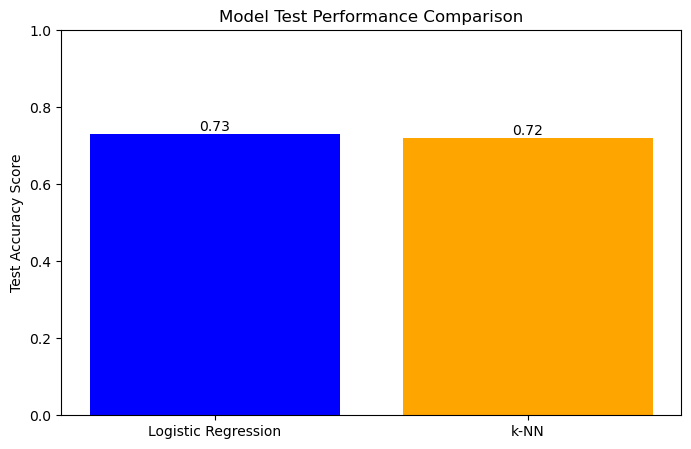

In [197]:
import matplotlib.pyplot as plt

# Model names and their test performance scores
models = ['Logistic Regression', 'k-NN']
test_scores = [0.73, 0.72]  # Replace these with your actual test accuracy scores

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, test_scores, color=['blue', 'orange'])

# Add labels and title
plt.ylabel('Test Accuracy Score')
plt.title('Model Test Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

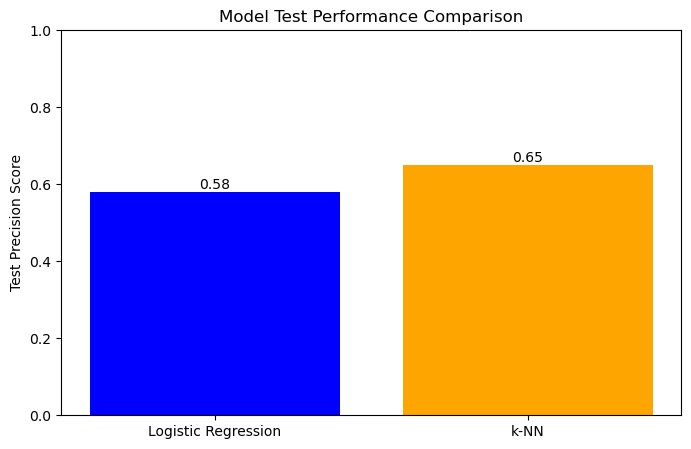

In [203]:
   test_scores = [0.58, 0.65]  # Replace with actual precision scores
   
# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, test_scores, color=['blue', 'orange'])

# Add labels and title
plt.ylabel('Test Precision Score')
plt.title('Model Test Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

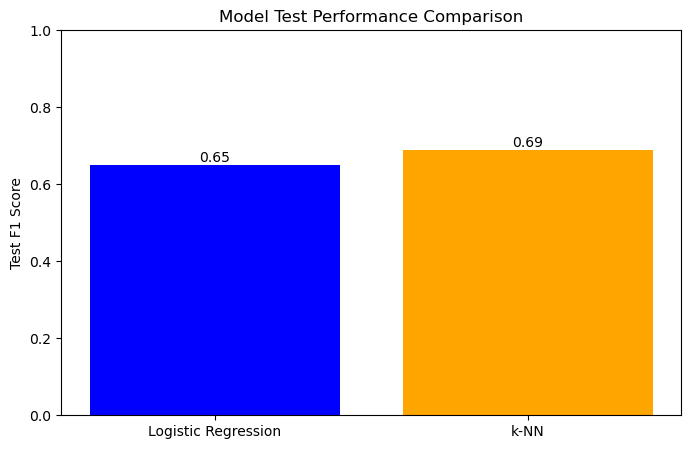

In [205]:
   test_scores = [0.65, 0.69]  # Replace with actual precision scores
   
# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, test_scores, color=['blue', 'orange'])

# Add labels and title
plt.ylabel('Test F1 Score')
plt.title('Model Test Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

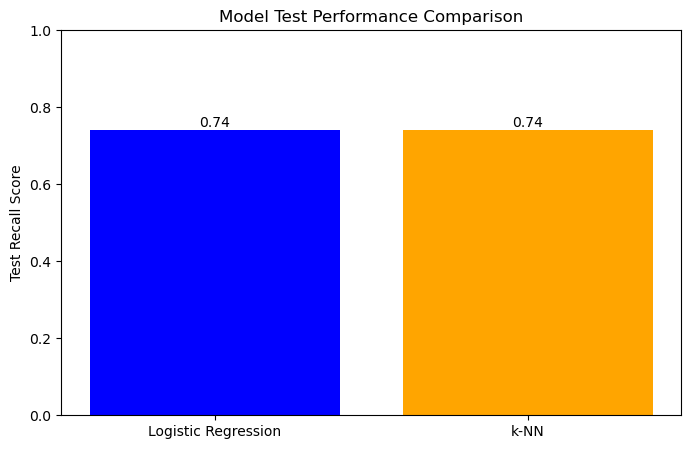

In [207]:
   test_scores = [0.74, 0.74]  # Replace with actual precision scores
   
# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, test_scores, color=['blue', 'orange'])

# Add labels and title
plt.ylabel('Test Recall Score')
plt.title('Model Test Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()